# Анализ покупательского поведения и товарных ассоциаций в интернет-ритейле

**Источник данных и предметная область**:

У нас есть датасет транзакций британского онлайн-магазина, специализирующегося на продаже уникальных подарков и сувениров. Данные собраны в период с 1 декабря 2010 года по 9 декабря 2011 года и включают в себя историю покупок как розничных клиентов, так и оптовых компаний

**Описание данных**:

Датасет содержит следующие ключевые поля:

- **InvoiceNo** — уникальный идентификатор транзакции (чека).
- **StockCode** — уникальный артикул товара.
- **Description** — наименование и описание товара.
- **Quantity** — количество единиц товара в чеке.
- **InvoiceDate** — дата и время совершения покупки.
- **UnitPrice** — цена за единицу товара в фунтах стерлингов.
- **CustomerID** — уникальный идентификатор клиента.
- **Country** — страна назначения заказа

Главная задача проекта — выявление скрытых паттернов в покупательском поведении. Это позволит ответить на ключевые для бизнеса вопросы: 

- Какие товары чаще всего покупаются вместе?
- Существуют ли товары-«магниты», которые стимулируют покупки других товаров?

## Предобработка данных

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('OnlineRetail.csv', encoding='latin1')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Приведем время в соответствующий формат 

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Замечаем в колонке `Quantity` и `UnitPrice` отрицательные значения. Исследуем данные записи

In [11]:
df[df['Quantity']<0].sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
...,...,...,...,...,...,...,...,...
240697,C558112,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,2011-06-26 16:08:00,9.95,17114.0,United Kingdom
240696,C558112,23091,ZINC HERB GARDEN CONTAINER,-1,2011-06-26 16:08:00,6.25,17114.0,United Kingdom
240694,C558112,82486,WOOD S/3 CABINET ANT WHITE FINISH,-1,2011-06-26 16:08:00,8.95,17114.0,United Kingdom
242447,C558347,S,SAMPLES,-1,2011-06-28 14:47:00,9.90,NaN,United Kingdom


In [12]:
df[df['UnitPrice']<0].sort_values('UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


- **Quantity** - 10 624 отрицательных значения:  
  Вероятно, это системные отметки о возвратах товаров

- **UnitPrice** - 2 отрицательных значения:  
  Вероятно, это ошибки при вводе данных

Для анализа фактических продаж оставляем только положительные значения в обеих колонках

In [14]:
# Удаляем отрицательные значения
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

Теперь разберемся с пропусками в данных

In [16]:
df.isnull().sum() / len(df) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.942275
Country         0.000000
dtype: float64

В четверть заказов отсутствует значение в `CustomerID`. Это не критично в нашем случае, но все же исследуем данные пропуски. Постараемся найти какие-нибудь различия между заказами с указанным и неуказанным идентификатором клиента

In [18]:
is_missing_customer = df['CustomerID'].isnull()

missing_summary = df.groupby(is_missing_customer).agg({
    'Quantity': ['mean', 'sum'],
    'UnitPrice': ['mean', 'max'],
    'InvoiceNo': 'nunique',
    'Country': lambda x: x.mode()[0]
}).round(2)

missing_summary

Quantity          UnitPrice           InvoiceNo         Country
               mean      sum      mean       max   nunique        <lambda>
CustomerID                                                                
False         12.99  5167812      3.12   8142.75     18532  United Kingdom
True           3.18   420564      6.29  13541.33      1428  United Kingdom

Заказы без **CustomerID** имеют существенно отличающийся профиль:

- В 4 раза меньше среднее количество товаров (3.18 vs 12.99)
- В 2 раза выше средняя цена товара (6.29 vs 3.12)
- Значительно меньше уникальных заказов (1428 vs 18532)
  
Это может указывать на разные каналы продаж или типы покупок (гостевые заказы, корпоративные продажи), где не требуется идентификация клиента

Для анализа "что покупают вместе" достаточно знать состав корзины, по этому оставим данные пропуски без изменений

In [20]:
# Удаляем транзакции с одним товаром (для анализа нужны корзины ≥2 товаров)
transaction_sizes = df.groupby('InvoiceNo').size()
multi_item_transactions = transaction_sizes[transaction_sizes >= 2].index
df_filtered = df[df['InvoiceNo'].isin(multi_item_transactions)]

print(f'Кол-во транзакций с одним товаром: {len(transaction_sizes[transaction_sizes == 1].index)}')

Кол-во транзакций с одним товаром: 1626


## Анализ ассоциативных правил

В машинном обучении выделяют отдельное направление, называемое **"Анализ ассоциативных правил"**. В нем рассматриваются задачи поиска частых наборов товаров. Классическим алгоритмом для решения данной задачи является `Apriori`, однако он может быть неэффективен для больших объемов данных и на практике редко используется. В качестве более производительного алгоритма будем использовать `FP-growth`. Данный алгоритм хранит данные в специальном префиксном FP-дереве. Это позволяет значительно ускорить поиск частых наборов без генерации кандидатов.

Про данный алгоритм нассказывает К.В.Воронцов в [данной лекции](https://www.youtube.com/watch?v=TgISAGknd6M&t=622s)

In [22]:
# Группируем товары по номерам чеков - каждая группа это одна корзина покупок
transactions = df_filtered.groupby('InvoiceNo')['Description'].apply(list).tolist()

# Анализ размера корзин
basket_sizes = [len(basket) for basket in transactions]
print(f"Средний размер корзины: {np.mean(basket_sizes):.1f} товаров")
print(f"Максимальный размер корзины: {max(basket_sizes)} товаров")

Средний размер корзины: 28.8 товаров
Максимальный размер корзины: 1114 товаров


Алгоритм `FP-growth` на вход получает так нахываемую транзакционную матрицу

Транзакционная матрица — это структура данных, где каждая строка соответствует одной покупке, а каждый столбец — уникальному товару в ассортименте магазина

Эта матрица является разреженной и бинарной. Ячейка матрицы содержит значение 1, если товар присутствовал в данной покупке, и 0 — если отсутствовал.

Для создания такой матрицы воспользуемся методом `TransactionEncoder`

In [24]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Создаем DataFrame где строки - транзакции, столбцы - товары, значения - 1/0
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Размер бинарной матрицы: {df_encoded.shape}")

Размер бинарной матрицы: (18334, 4016)


Мы получили матрицу размера `(18334, 4016)`. Это означает, что у нас рассматривается 18334 покупок и 4016 товаров

Найдем частые наборы с помощью алгоритма `FP-growth`. Мы будем использовать параметр `min_support=0.025`. Он означет, что набор должен встречаться хотя бы в 2.5%

In [27]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(df_encoded, min_support=0.025, use_colnames=True)

print(f"Найдено частых наборов товаров: {len(frequent_itemsets)}")

Найдено частых наборов товаров: 268


После выявления частых наборов товаров мы переходим к генерации ассоциативных правил, которые позволяют определить направленные связи между товарами. Метод `association_rules` преобразует найденные наборы в правила вида "если покупают товар A, то с высокой вероятностью покупают товар B". Для оценки используются три ключевые метрики:

- **Support**: как часто правило встречается во всех транзакциях
- **Confidence** - вероятность купить товар B при покупке товара A
- **Lift** - насколько чаще покупают A и B вместе, чем случайно


Будем использовать метрику `Lift` с порогом 1.2 - это означает, что товары покупаются вместе как минимум на 20% чаще, чем если бы их покупки были независимы. Тем самым мы выбрасываем случайные совпадения

In [29]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

print(f"Сгенерировано правил: {len(rules)}")

Сгенерировано правил: 100


Теперь отфильтруем наши наборы на оставшихся двух метриках: **Support** и **Confidence**

In [31]:
# Фильтруем правила по комбинации метрик
strong_rules = rules[
    (rules['confidence'] > 0.3) &
    (rules['support'] > 0.03)
].sort_values('lift', ascending=False)

print(f"Сильных правил после фильтрации: {len(strong_rules)}")
strong_rules

Сильных правил после фильтрации: 28


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
76,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.055253,0.041453,0.034471,0.623889,15.050512,1.0,0.032181,2.548578,0.988155,0.553900,0.607624,0.727734
77,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.041453,0.055253,0.034471,0.831579,15.050512,1.0,0.032181,5.609438,0.973929,0.553900,0.821729,0.727734
79,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.041453,0.057925,0.032617,0.786842,13.583769,1.0,0.030216,4.419610,0.966445,0.488562,0.773736,0.674965
78,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.057925,0.041453,0.032617,0.563089,13.583769,1.0,0.030216,2.193916,0.983343,0.488562,0.544194,0.674965
63,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.057925,0.055253,0.041835,0.722222,13.071295,1.0,0.038634,3.401091,0.980279,0.586391,0.705977,0.739690
62,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.055253,0.057925,0.041835,0.757157,13.071295,1.0,0.038634,3.879357,0.977506,0.586391,0.742225,0.739690
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.053180,0.057271,0.034908,0.656410,11.461548,1.0,0.031862,2.743765,0.964018,0.462094,0.635537,0.632967
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.057271,0.053180,0.034908,0.609524,11.461548,1.0,0.031862,2.424783,0.968201,0.462094,0.587592,0.632967
33,(PAPER CHAIN KIT 50'S CHRISTMAS ),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.062889,0.044507,0.030108,0.478751,10.756645,1.0,0.027309,1.833083,0.967904,0.389555,0.454471,0.577611
32,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.044507,0.062889,0.030108,0.676471,10.756645,1.0,0.027309,2.896526,0.949284,0.389555,0.654759,0.577611


По итогу мы получили 28 правил, которые раскрывают взаимные связи между товарами. 

Если приглядеться к получившемуся результату, то можно заметить, что многие товары образуют симметричные пары. Покупка товара **A** увеличивает вероятность покупки товара **B**, и наоборот. Это указывает на взаимодополняемость товаров и возможность создания товарных наборов.

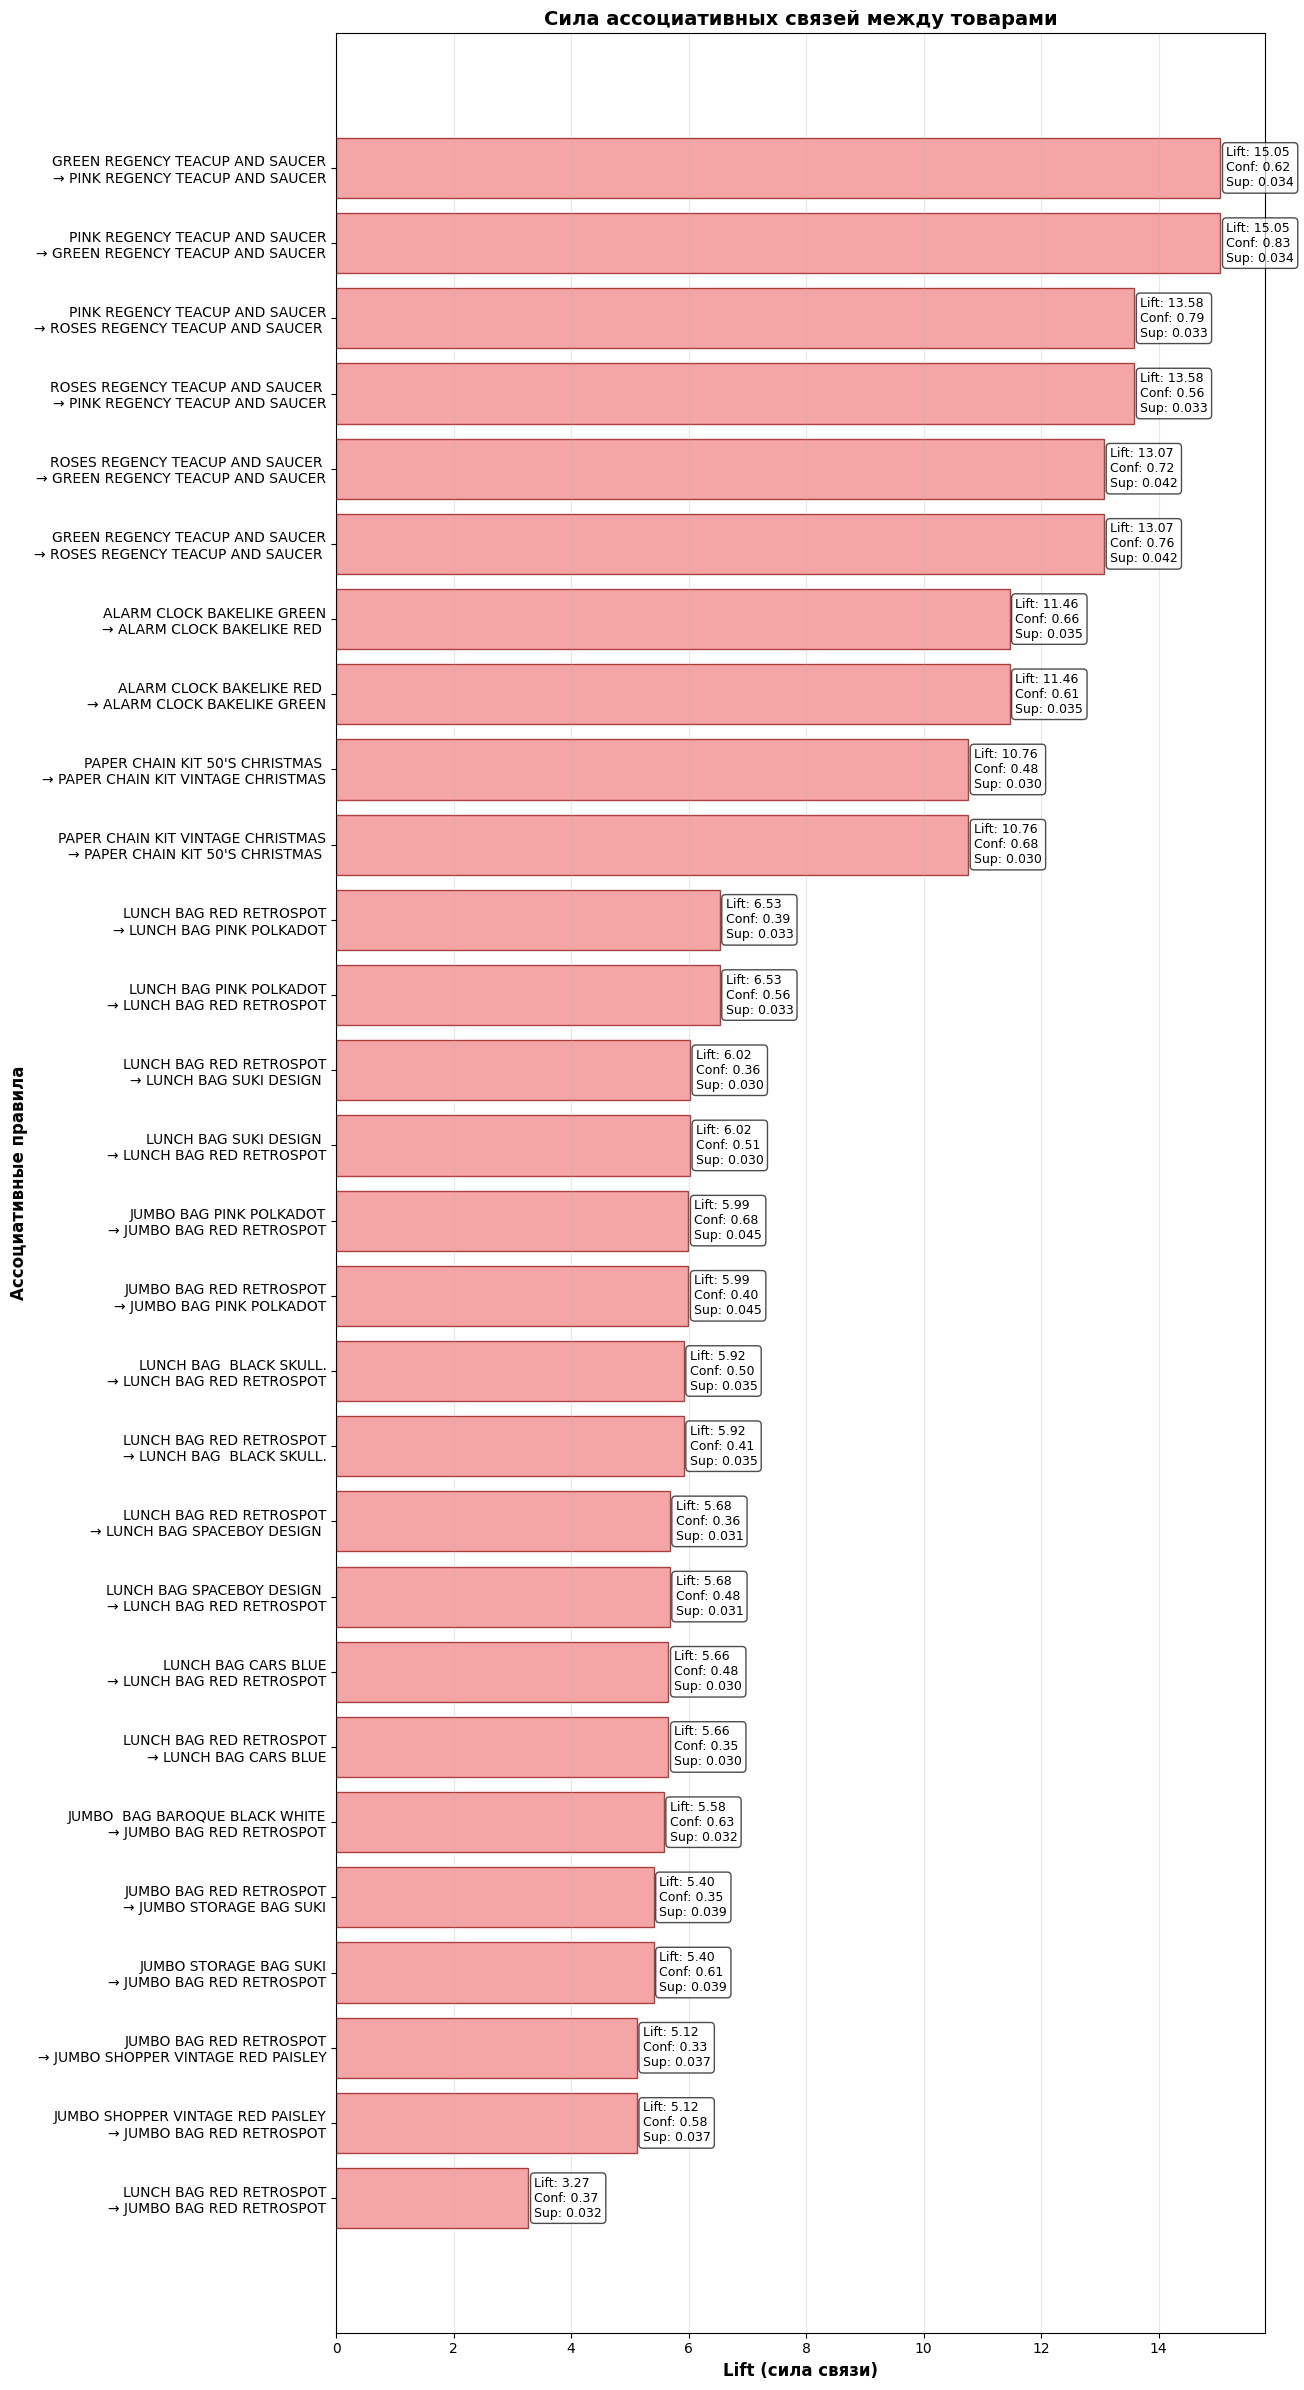

In [33]:
plt.figure(figsize=(16, 24))

sorted_rules = strong_rules.sort_values('lift', ascending=True)

labels = []
for _, rule in sorted_rules.iterrows():
    antecedent = list(rule['antecedents'])[0]
    consequent = list(rule['consequents'])[0]
    ant_short = antecedent[:35] + "..." if len(antecedent) > 35 else antecedent
    cons_short = consequent[:35] + "..." if len(consequent) > 35 else consequent
    labels.append(f"{ant_short}\n→ {cons_short}")

bars = plt.barh(range(len(sorted_rules)), sorted_rules['lift'], 
                color='lightcoral', alpha=0.7, edgecolor='darkred')

plt.yticks(range(len(sorted_rules)), labels, fontsize=10)
plt.ylabel('Ассоциативные правила', fontweight='bold', fontsize=12)
plt.xlabel('Lift (сила связи)', fontweight='bold', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for i, (bar, lift_val, conf_val, sup_val) in enumerate(zip(bars, sorted_rules['lift'], 
                                                         sorted_rules['confidence'], 
                                                         sorted_rules['support'])):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'Lift: {lift_val:.2f}\nConf: {conf_val:.2f}\nSup: {sup_val:.3f}', 
             va='center', fontsize=9, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.title('Сила ассоциативных связей между товарами', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(left=0.4)

## Выводы

1. Взаимные покупки между **PINK**, **GREEN** и **ROSES** REGENCY TEACUP AND SAUCER
   * При покупке **PINK** версии с вероятностью 83% в чеке есть и **GREEN**.
   * Это не просто пары, а полноценный "чайный клуб". Связь очень сильная `(Lift > 13)`.

**Рекомендации**: 
* Их стоит продавать в виде готового набора из трёх предметов
* Рекомендовать их друг к другу в интернет-магазине

2. **PAPER CHAIN KIT 50'S CHRISTMAS** -> **PAPER CHAIN KIT VINTAGE CHRISTMAS** `(Confidence 47.9%)`

   **PAPER CHAIN KIT VINTAGE CHRISTMAS** -> **PAPER CHAIN KIT 50'S CHRISTMAS** `(Confidence 67.6%)`

   * Серьезная асимметрия. Покупатели "Винтажного" дизайна с гораздо большей вероятностью докупают "50's", но не наоборот. Возможно, "Vintage" считается основным товаром, а "50's" — дополнением к нему

3. **JUMBO BAG PINK POLKADOT** -> **JUMBO BAG RED RETROSPOT** `(Confidence 67.8%)`

   **JUMBO BAG RED RETROSPOT** -> **JUMBO BAG PINK POLKADOT** `(Confidence 39.8%)`

   * Разница почти в два раза. Это означает, что розовая сумка в горох — это товар, который часто покупают вместе с красной, а вот красная сумка — гораздо более самостоятельный и популярный товар, который часто покупают одну. Розовая, видимо, воспринимается как дополнение или второй вариант

4. **LUNCH BAG RED RETROSPOT** — фигурирует в 8 из 28 правил (~ 29%)

   * Это, скорее всего, бестселлер или базовый товар. Покупатели, беря ланч-бокс другого дизайна, часто добавляют к нему и красный в горошек.
  
5. **LUNCH BAG RED RETROSPOT** -> **JUMBO BAG RED RETROSPOT**

   * Это одна из немногих сильных связей между товарами из разных категорий (маленькая сумка для ланча и большая сумка для покупок).
   * Их объединяет не функция, а дизайн (RED RETROSPOT). Это указывает на силу брендирования и единого стиля. Покупатели, которым нравится этот принт, готовы покупать его в разных товарных категориях


## Рекомендации

- **REGENCY TEACUP AND SAUCER** типа **PINK**, **GREEN** и **ROSES** можно продавать в виде готового набора из трёх предметов, а так же рекомендовать их друг к другу в интернет-магазине
  
- На странице товара **PAPER CHAIN KIT VINTAGE CHRISTMAS** следует настроить более агрессивное предложение "Часто покупают вместе" с товаром **50's CHRISTMAS**, поскольку оно имеет высокую (67.6%) вероятность конверсии. Обратная рекомендация может быть менее приоритетной

- На странице товара **JUMBO BAG PINK POLKADOT** разместить блок с рекомендацией "Часто покупают вместе" с красной сумкой, тогда как на странице красной сумки это не является приоритетом

- Возвести товар **LUNCH BAG RED RETROSPOT** в статус "хита продаж" и агрессивно рекомендовать его на страницах всех остальных ланч-боксов и в разделе "С этим товаром покупают"

- Создать тематические подборки товаров по принципу единого дизайна, например, коллекцию **RED RETROSPOT**, объединяющую ланч-боксы, большие сумки и другие товары в этом стиле для увеличения среднего чека